# 01 - Data Overview



***INVENTORY OPTIMIZATION WITH PROCUREMENT STRATEGY***
================================================================================
# Notebook 01: Data Overview & Initial Exploration.
## Author: Mohamed Osman
## Date: January 2025
## GitHub: https://github.com/arifi89
## LinkedIn: https://www.linkedin.com/in/mohamed-osman-123456789/

================================================================================
## ***OBJECTIVE:***
This notebook performs the initial data loading and exploration phase of our
inventory optimization project. We will:

 **1. Load all 6 datasets from the data/raw/ folder**.
 **2. Understand the structure and schema of each dataset**.
 **3. Perform initial data quality assessment**.
 **4. Identify relationships between datasets**.
 **5. Generate summary statistics**.
 **6. Create initial visualizations**.
 **7. Document findings for next steps**.

## ***BUSINESS CONTEXT:***
##### We are analyzing a full year (2016) of inventory, purchase, and sales data to optimize inventory levels, reduce costs, and develop strategic procurement recommendations.

## ***DATASETS:***
##### 1. BegInvFINAL12312016.csv - Beginning inventory (Jan 1, 2016)
##### 2. PurchasesFINAL12312016.csv - All purchases made in 2016
##### 3. InvoicePurchases12312016.csv - Detailed invoice-level purchases
##### 4. SalesFINAL12312016.csv - Sales transactions in 2016
##### 5. EndInvFINAL12312016.csv - Ending inventory (Dec 31, 2016)
##### 6. 2017PurchasePricesDec.csv - Future pricing data for planning

================================================================================
"""



## SECTION 1: ENVIRONMENT SETUP

In [1]:
print("="*80)
print("📦 SECTION 1: ENVIRONMENT SETUP")
print("="*80)

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.width', None)

# Set visualization style
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully")
print("✅ Display options configured")
print("✅ Visualization style set\n")



📦 SECTION 1: ENVIRONMENT SETUP
✅ Libraries imported successfully
✅ Display options configured
✅ Visualization style set



## SECTION 2: DEFINE FILE PATHS

In [2]:
print("="*80)
print("📁 SECTION 2: DEFINE FILE PATHS")
print("="*80)

# Define the base path to your data folder
# IMPORTANT: Since this notebook is in notebooks/ folder, we go up one level
BASE_PATH = Path("../data/raw")

# Define all file paths
file_paths = {
    'beginning_inventory': BASE_PATH / "BegInvFINAL12312016.csv",
    'purchases': BASE_PATH / "PurchasesFINAL12312016.csv",
    'invoice_purchases': BASE_PATH / "InvoicePurchases12312016.csv",
    'sales': BASE_PATH / "SalesFINAL12312016.csv",
    'ending_inventory': BASE_PATH / "EndInvFINAL12312016.csv",
    'future_prices': BASE_PATH / "2017PurchasePricesDec.csv"
}

# Verify that all files exist
print("\n🔍 Verifying file existence:")
all_files_exist = True
for name, path in file_paths.items():
    exists = path.exists()
    status = "✅" if exists else "❌"
    print(f"{status} {name}: {path}")
    if not exists:
        all_files_exist = False

if not all_files_exist:
    print("\n⚠️  WARNING: Some files are missing!")
    print("   Please ensure all CSV files are in the data/raw/ folder")
    print("   and the BASE_PATH is correctly set.")
else:
    print("\n✅ All files found successfully!\n")


📁 SECTION 2: DEFINE FILE PATHS

🔍 Verifying file existence:
✅ beginning_inventory: ..\data\raw\BegInvFINAL12312016.csv
✅ purchases: ..\data\raw\PurchasesFINAL12312016.csv
✅ invoice_purchases: ..\data\raw\InvoicePurchases12312016.csv
✅ sales: ..\data\raw\SalesFINAL12312016.csv
✅ ending_inventory: ..\data\raw\EndInvFINAL12312016.csv
✅ future_prices: ..\data\raw\2017PurchasePricesDec.csv

✅ All files found successfully!



## SECTION 3: LOAD DATASETS

In [3]:
print("="*80)
print("📊 SECTION 3: LOAD DATASETS")
print("="*80)

# Dictionary to store all dataframes
dataframes = {}

# Load each dataset with error handling and progress tracking
for name, path in file_paths.items():
    try:
        print(f"\n⏳ Loading: {name}...")
        
        # Load the CSV file
        df = pd.read_csv(path)
        
        # Store in dictionary
        dataframes[name] = df
        
        # Display success message with key info
        print(f"   ✅ Loaded successfully!")
        print(f"   📏 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
        print(f"   💾 Memory: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
    except FileNotFoundError:
        print(f"   ❌ ERROR: File not found at {path}")
    except pd.errors.EmptyDataError:
        print(f"   ❌ ERROR: File is empty")
    except Exception as e:
        print(f"   ❌ ERROR: {str(e)}")

# Create individual variables for easier access throughout the notebook
beg_inv = dataframes.get('beginning_inventory')
purchases = dataframes.get('purchases')
invoice_purchases = dataframes.get('invoice_purchases')
sales = dataframes.get('sales')
end_inv = dataframes.get('ending_inventory')
future_prices = dataframes.get('future_prices')

print("\n" + "="*80)
print("✅ DATA LOADING COMPLETE")
print(f"   Total datasets loaded: {len(dataframes)}/6")
print("="*80)


📊 SECTION 3: LOAD DATASETS

⏳ Loading: beginning_inventory...
   ✅ Loaded successfully!
   📏 Shape: 206,529 rows × 9 columns
   💾 Memory: 66.94 MB

⏳ Loading: purchases...
   ✅ Loaded successfully!
   📏 Shape: 2,372,474 rows × 16 columns
   💾 Memory: 1278.97 MB

⏳ Loading: invoice_purchases...
   ✅ Loaded successfully!
   📏 Shape: 5,543 rows × 10 columns
   💾 Memory: 1.73 MB

⏳ Loading: sales...
   ✅ Loaded successfully!
   📏 Shape: 1,048,575 rows × 14 columns
   💾 Memory: 395.01 MB

⏳ Loading: ending_inventory...
   ✅ Loaded successfully!
   📏 Shape: 224,489 rows × 9 columns
   💾 Memory: 72.74 MB

⏳ Loading: future_prices...
   ✅ Loaded successfully!
   📏 Shape: 12,261 rows × 9 columns
   💾 Memory: 3.43 MB

✅ DATA LOADING COMPLETE
   Total datasets loaded: 6/6


## SECTION 4: INITIAL DATA EXPLORATION

In [4]:
print("\n" + "="*80)
print("🔍 SECTION 4: INITIAL DATA EXPLORATION")
print("="*80)

def explore_dataset(df, dataset_name):
    """
    Comprehensive exploration function for each dataset
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe to explore
    dataset_name : str
        Name of the dataset for display
    
    Returns:
    --------
    None (prints exploration results)
    
    What This Function Does:
    ------------------------
    1. Displays basic dataset information (rows, columns, memory)
    2. Shows data types for each column
    3. Checks for missing values
    4. Identifies duplicate records
    5. Displays the first few rows
    6. Shows summary statistics for numeric columns
    """
    
    print(f"\n{'='*80}")
    print(f"📋 DATASET: {dataset_name.upper()}")
    print(f"{'='*80}")
    
    # 1. Basic Information
    print(f"\n📊 BASIC INFORMATION:")
    print(f"   • Total Records: {len(df):,}")
    print(f"   • Total Columns: {len(df.columns)}")
    print(f"   • Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # 2. Column Details
    print(f"\n📝 COLUMN DETAILS:")
    print(f"{'Column Name':<35} {'Data Type':<15} {'Non-Null':<12} {'Null %':<10}")
    print("-" * 80)
    
    for col in df.columns:
        non_null_count = df[col].count()
        null_percentage = (1 - non_null_count / len(df)) * 100
        dtype = str(df[col].dtype)
        
        print(f"{col:<35} {dtype:<15} {non_null_count:<12,} {null_percentage:>6.2f}%")
    
    # 3. Missing Values Summary
    total_missing = df.isnull().sum().sum()
    missing_percentage = (total_missing / (len(df) * len(df.columns))) * 100
    print(f"\n🔍 MISSING VALUES:")
    print(f"   • Total Missing: {total_missing:,}")
    print(f"   • Missing Percentage: {missing_percentage:.2f}%")
    
    # 4. Duplicate Records
    duplicates = df.duplicated().sum()
    duplicate_percentage = (duplicates / len(df)) * 100
    print(f"\n🔄 DUPLICATE RECORDS:")
    print(f"   • Total Duplicates: {duplicates:,}")
    print(f"   • Duplicate Percentage: {duplicate_percentage:.2f}%")
    
    # 5. First Few Rows
    print(f"\n👀 FIRST 3 ROWS:")
    print(df.head(3).to_string())
    
    # 6. Summary Statistics (for numeric columns only)
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📈 SUMMARY STATISTICS (Numeric Columns):")
        print(df[numeric_cols].describe().to_string())
    else:
        print(f"\n⚠️  No numeric columns found in this dataset")
    
    print(f"\n{'='*80}\n")

# Explore each dataset
for name, df in dataframes.items():
    if df is not None:
        explore_dataset(df, name)



🔍 SECTION 4: INITIAL DATA EXPLORATION

📋 DATASET: BEGINNING_INVENTORY

📊 BASIC INFORMATION:
   • Total Records: 206,529
   • Total Columns: 9
   • Memory Usage: 66.94 MB

📝 COLUMN DETAILS:
Column Name                         Data Type       Non-Null     Null %    
--------------------------------------------------------------------------------
InventoryId                         str             206,529        0.00%
Store                               int64           206,529        0.00%
City                                str             206,529        0.00%
Brand                               int64           206,529        0.00%
Description                         str             206,529        0.00%
Size                                str             206,529        0.00%
onHand                              int64           206,529        0.00%
Price                               float64         206,529        0.00%
startDate                           str             206,529        0.

## SECTION 5: DATA QUALITY ASSESSMENT

In [5]:
# ============================================================================
# SECTION 5: DATA QUALITY ASSESSMENT
# ============================================================================
print("\n" + "="*80)
print("🎯 SECTION 5: DATA QUALITY ASSESSMENT")
print("="*80)

def generate_quality_report(dataframes_dict):
    """
    Generate a comprehensive data quality report
    
    Parameters:
    -----------
    dataframes_dict : dict
        Dictionary of dataframe name: dataframe pairs
    
    Returns:
    --------
    pandas.DataFrame
        Quality metrics summary table
    
    Quality Metrics Calculated:
    ---------------------------
    - Total rows and columns
    - Number of duplicate rows
    - Total missing values and percentage
    - Count of numeric vs text columns
    - Memory usage
    """
    
    quality_metrics = []
    
    for name, df in dataframes_dict.items():
        if df is not None:
            total_cells = len(df) * len(df.columns)
            missing_cells = df.isnull().sum().sum()
            
            metrics = {
                'Dataset': name.replace('_', ' ').title(),
                'Rows': f"{len(df):,}",
                'Columns': len(df.columns),
                'Duplicates': f"{df.duplicated().sum():,}",
                'Missing Values': f"{missing_cells:,}",
                'Missing %': f"{(missing_cells / total_cells * 100):.2f}%",
                'Numeric Cols': len(df.select_dtypes(include=[np.number]).columns),
                'Text Cols': len(df.select_dtypes(include=['object']).columns),
                'Memory (MB)': f"{df.memory_usage(deep=True).sum() / 1024**2:.2f}"
            }
            quality_metrics.append(metrics)
    
    return pd.DataFrame(quality_metrics)

# Generate and display quality report
quality_report = generate_quality_report(dataframes)

print("\n📊 DATA QUALITY SUMMARY TABLE:")
print(quality_report.to_string(index=False))



🎯 SECTION 5: DATA QUALITY ASSESSMENT

📊 DATA QUALITY SUMMARY TABLE:
            Dataset      Rows  Columns Duplicates Missing Values Missing %  Numeric Cols  Text Cols Memory (MB)
Beginning Inventory   206,529        9          0              0     0.00%             4          5       66.94
          Purchases 2,372,474       16          0              3     0.00%             8          8     1278.97
  Invoice Purchases     5,543       10          0          5,169     9.33%             5          5        1.73
              Sales 1,048,575       14          0              0     0.00%             9          5      395.01
   Ending Inventory   224,489        9          0          1,284     0.06%             4          5       72.74
      Future Prices    12,261        9          0              3     0.00%             5          4        3.43


In [8]:
# ============================================================================
# SECTION 6: DATASET RELATIONSHIPS
# ============================================================================
print("\n" + "="*80)
print("🔗 SECTION 6: DATASET RELATIONSHIPS")
print("="*80)

print("""
📋 HOW THE DATASETS CONNECT:

INVENTORY FLOW (Main Logic):
═══════════════════════════════════════════════════════════════════════════
Beginning Inventory (Jan 1, 2016)
    +
Purchases (throughout 2016)
    -
Sales (throughout 2016)
    ±
Adjustments (shrinkage, returns, etc.)
    =
Ending Inventory (Dec 31, 2016)
═══════════════════════════════════════════════════════════════════════════

DATASET CONNECTIONS:

1. BEGINNING_INVENTORY
   ├─ Purpose: Starting stock levels (Jan 1, 2016)
   ├─ Links to: All other datasets via Product/SKU identifier
   └─ Use: Calculate inventory turnover and changes

2. PURCHASES
   ├─ Purpose: Record of all items purchased during 2016
   ├─ Links to: Beginning/Ending Inventory (by Product)
   ├─ Links to: Invoice Purchases (by Date/Invoice)
   └─ Use: Analyze purchasing patterns and supplier performance

3. INVOICE_PURCHASES
   ├─ Purpose: Detailed invoice-level purchase information
   ├─ Links to: Purchases (by Invoice Number/Date)
   └─ Use: Supplier analysis, payment terms, detailed costing

4. SALES
   ├─ Purpose: All sales transactions during 2016
   ├─ Links to: Inventory datasets (by Product)
   └─ Use: Demand analysis, ABC classification, forecasting

5. ENDING_INVENTORY
   ├─ Purpose: Final stock levels (Dec 31, 2016)
   ├─ Verification: Should match calculated inventory
   └─ Use: Validate inventory equation, identify discrepancies

6. FUTURE_PRICES (2017)
   ├─ Purpose: Projected prices for next year
   ├─ Links to: All datasets (by Product)
   └─ Use: Cost planning, budget forecasting, price variance analysis
""")

# Find common columns across datasets
print("\n🔑 IDENTIFYING COMMON COLUMNS (Potential Keys):")

all_columns = {}
for name, df in dataframes.items():
    if df is not None:
        all_columns[name] = set(df.columns)

# Count column occurrences
column_frequency = {}
for name, cols in all_columns.items():
    for col in cols:
        if col not in column_frequency:
            column_frequency[col] = []
        column_frequency[col].append(name)

# Display columns appearing in multiple datasets
print("\n📊 Columns appearing in multiple datasets (potential join keys):")
common_columns = {col: datasets for col, datasets in column_frequency.items() 
                  if len(datasets) > 1}

for col, datasets in sorted(common_columns.items(), 
                            key=lambda x: len(x[1]), 
                            reverse=True):
    print(f"\n   '{col}' appears in {len(datasets)} datasets:")
    for dataset in datasets:
        print(f"      • {dataset}")



🔗 SECTION 6: DATASET RELATIONSHIPS

📋 HOW THE DATASETS CONNECT:

INVENTORY FLOW (Main Logic):
═══════════════════════════════════════════════════════════════════════════
Beginning Inventory (Jan 1, 2016)
    +
Purchases (throughout 2016)
    -
Sales (throughout 2016)
    ±
Adjustments (shrinkage, returns, etc.)
    =
Ending Inventory (Dec 31, 2016)
═══════════════════════════════════════════════════════════════════════════

DATASET CONNECTIONS:

1. BEGINNING_INVENTORY
   ├─ Purpose: Starting stock levels (Jan 1, 2016)
   ├─ Links to: All other datasets via Product/SKU identifier
   └─ Use: Calculate inventory turnover and changes

2. PURCHASES
   ├─ Purpose: Record of all items purchased during 2016
   ├─ Links to: Beginning/Ending Inventory (by Product)
   ├─ Links to: Invoice Purchases (by Date/Invoice)
   └─ Use: Analyze purchasing patterns and supplier performance

3. INVOICE_PURCHASES
   ├─ Purpose: Detailed invoice-level purchase information
   ├─ Links to: Purchases (by Invoice

## SECTION 7: INITIAL BUSINESS INSIGHTS

In [9]:
# ============================================================================
# SECTION 7: INITIAL BUSINESS INSIGHTS
# ============================================================================
print("\n" + "="*80)
print("💡 SECTION 7: INITIAL BUSINESS INSIGHTS")
print("="*80)

print("\n📊 QUICK BUSINESS METRICS:\n")

# Total records across all datasets
total_records = sum([len(df) for df in dataframes.values() if df is not None])
print(f"   • Total Records Across All Datasets: {total_records:,}")

# Total columns
total_columns = sum([len(df.columns) for df in dataframes.values() if df is not None])
print(f"   • Total Columns Available for Analysis: {total_columns}")

# Data completeness
total_cells = sum([len(df) * len(df.columns) for df in dataframes.values() if df is not None])
total_missing = sum([df.isnull().sum().sum() for df in dataframes.values() if df is not None])

if total_cells > 0:
    completeness = ((total_cells - total_missing) / total_cells) * 100
    print(f"   • Overall Data Completeness: {completeness:.2f}%")
else:
    print(f"   • Overall Data Completeness: N/A (no data loaded)")

# Memory usage
total_memory = sum([df.memory_usage(deep=True).sum() / 1024**2 
                    for df in dataframes.values() if df is not None])
print(f"   • Total Memory Usage: {total_memory:.2f} MB")


💡 SECTION 7: INITIAL BUSINESS INSIGHTS

📊 QUICK BUSINESS METRICS:

   • Total Records Across All Datasets: 3,869,871
   • Total Columns Available for Analysis: 67
   • Overall Data Completeness: 99.99%
   • Total Memory Usage: 1818.82 MB



📊 SECTION 8: DATA QUALITY VISUALIZATIONS


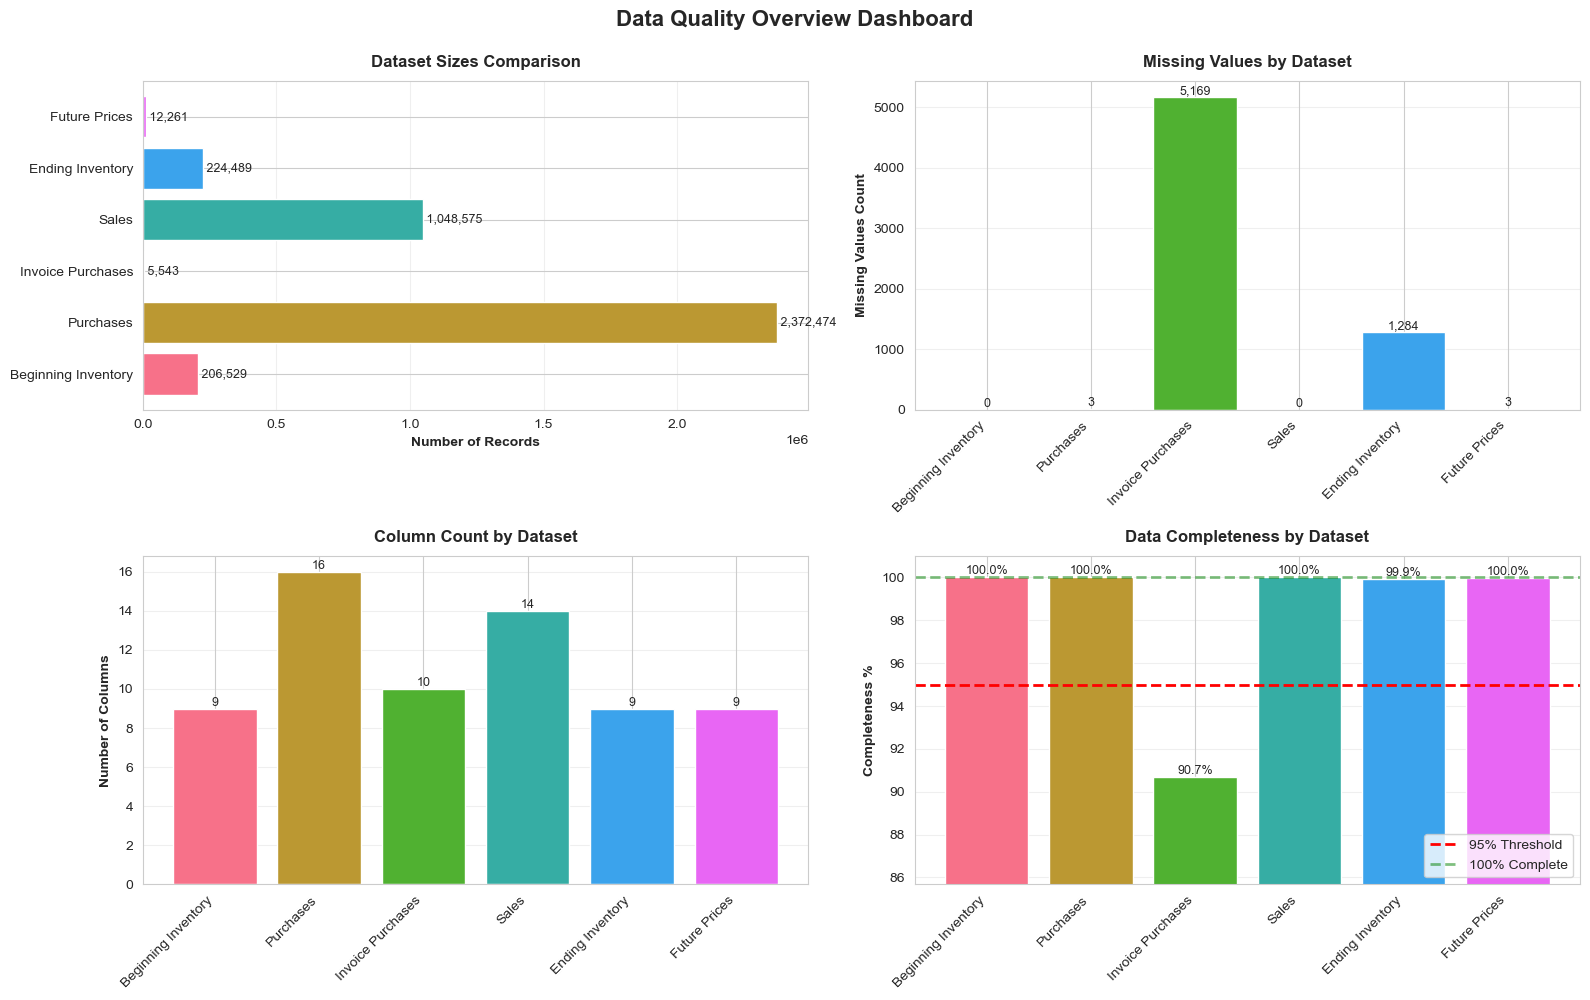


✅ Data quality visualizations generated successfully!


In [10]:
# ============================================================================
# SECTION 8: DATA QUALITY VISUALIZATIONS
# ============================================================================
print("\n" + "="*80)
print("📊 SECTION 8: DATA QUALITY VISUALIZATIONS")
print("="*80)

# Only create visualizations if we have data
if len(dataframes) > 0 and any(df is not None for df in dataframes.values()):
    # Create a comprehensive visualization dashboard
    fig = plt.figure(figsize=(16, 10))
    fig.suptitle('Data Quality Overview Dashboard', fontsize=16, fontweight='bold', y=0.995)

    # Prepare data for visualizations
    dataset_names = [name.replace('_', ' ').title() for name in dataframes.keys()]
    dataset_sizes = [len(df) for df in dataframes.values() if df is not None]
    missing_values = [df.isnull().sum().sum() for df in dataframes.values() if df is not None]
    column_counts = [len(df.columns) for df in dataframes.values() if df is not None]
    completeness_pct = [((len(df) * len(df.columns) - df.isnull().sum().sum()) / 
                          (len(df) * len(df.columns))) * 100 
                        for df in dataframes.values() if df is not None]

    colors = sns.color_palette("husl", len(dataset_names))

    # 1. Dataset Sizes Comparison
    ax1 = plt.subplot(2, 2, 1)
    bars1 = ax1.barh(dataset_names, dataset_sizes, color=colors)
    ax1.set_xlabel('Number of Records', fontweight='bold')
    ax1.set_title('Dataset Sizes Comparison', fontweight='bold', pad=10)
    ax1.grid(axis='x', alpha=0.3)

    # Add value labels
    for i, (bar, value) in enumerate(zip(bars1, dataset_sizes)):
        ax1.text(value, i, f' {value:,}', va='center', fontsize=9)

    # 2. Missing Values by Dataset
    ax2 = plt.subplot(2, 2, 2)
    bars2 = ax2.bar(range(len(dataset_names)), missing_values, color=colors)
    ax2.set_ylabel('Missing Values Count', fontweight='bold')
    ax2.set_title('Missing Values by Dataset', fontweight='bold', pad=10)
    ax2.set_xticks(range(len(dataset_names)))
    ax2.set_xticklabels(dataset_names, rotation=45, ha='right')
    ax2.grid(axis='y', alpha=0.3)

    # Add value labels
    for bar, value in zip(bars2, missing_values):
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(value):,}', ha='center', va='bottom', fontsize=9)

    # 3. Column Count by Dataset
    ax3 = plt.subplot(2, 2, 3)
    bars3 = ax3.bar(range(len(dataset_names)), column_counts, color=colors)
    ax3.set_ylabel('Number of Columns', fontweight='bold')
    ax3.set_title('Column Count by Dataset', fontweight='bold', pad=10)
    ax3.set_xticks(range(len(dataset_names)))
    ax3.set_xticklabels(dataset_names, rotation=45, ha='right')
    ax3.grid(axis='y', alpha=0.3)

    # Add value labels
    for bar, value in zip(bars3, column_counts):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(value)}', ha='center', va='bottom', fontsize=9)

    # 4. Data Completeness Percentage
    ax4 = plt.subplot(2, 2, 4)
    bars4 = ax4.bar(range(len(dataset_names)), completeness_pct, color=colors)
    ax4.set_ylabel('Completeness %', fontweight='bold')
    ax4.set_title('Data Completeness by Dataset', fontweight='bold', pad=10)
    ax4.set_xticks(range(len(dataset_names)))
    ax4.set_xticklabels(dataset_names, rotation=45, ha='right')
    ax4.axhline(y=95, color='red', linestyle='--', linewidth=2, label='95% Threshold')
    ax4.axhline(y=100, color='green', linestyle='--', linewidth=2, alpha=0.5, label='100% Complete')
    ax4.legend(loc='lower right')
    ax4.set_ylim([min(completeness_pct) - 5 if min(completeness_pct) < 95 else 90, 101])
    ax4.grid(axis='y', alpha=0.3)

    # Add value labels
    for bar, value in zip(bars4, completeness_pct):
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2., height,
                 f'{value:.1f}%', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()

    print("\n✅ Data quality visualizations generated successfully!")
else:
    print("\n⚠️  No data loaded - skipping visualizations")

## SECTION 9: SUMMARY & NEXT STEPS

In [12]:
# ============================================================================
# SECTION 9: SUMMARY & NEXT STEPS
# ============================================================================
print("\n" + "="*80)
print("✅ NOTEBOOK 01 COMPLETE: DATA OVERVIEW & INITIAL EXPLORATION")
print("="*80)

print("""
🎉 WHAT WE ACCOMPLISHED:
═══════════════════════════════════════════════════════════════════════════
  ✓ Successfully loaded 6 datasets from local files
  ✓ Explored structure and schema of each dataset
  ✓ Performed comprehensive data quality assessment
  ✓ Identified relationships and common columns between datasets
  ✓ Generated summary statistics for all datasets
  ✓ Created data quality visualizations
  ✓ Established a solid foundation for analysis

📊 KEY FINDINGS:
═══════════════════════════════════════════════════════════════════════════
""")

# Dynamic findings based on actual data
print(f"  • Total datasets loaded: {len(dataframes)}")
print(f"  • Total records available: {total_records:,}")
if total_cells > 0:
    print(f"  • Overall data completeness: {completeness:.2f}%")

# Check if any dataset has high missing values
datasets_with_issues = []
for name, df in dataframes.items():
    if df is not None:
        missing_pct = (df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100
        if missing_pct > 5:
            datasets_with_issues.append(f"{name} ({missing_pct:.1f}% missing)")

if datasets_with_issues:
    print("\n  ⚠️  Datasets requiring attention:")
    for issue in datasets_with_issues:
        print(f"     • {issue}")
else:
    print("\n  ✅ All datasets have good data quality (<5% missing values)")

print("""
🔜 NEXT STEPS (Notebook 02 - Data Cleaning):
═══════════════════════════════════════════════════════════════════════════
  1. Handle missing values and outliers
  2. Standardize column names and data types
  3. Parse and validate dates
  4. Create unique product identifiers
  5. Merge datasets where appropriate
  6. Validate the inventory equation
  7. Export cleaned datasets to data/processed/

📚 WHAT YOU LEARNED:
═══════════════════════════════════════════════════════════════════════════
  • How to systematically load and validate multiple datasets
  • Data quality assessment techniques
  • Identifying relationships between datasets
  • Creating comprehensive exploration functions
  • Professional data visualization practices
  • Documentation and communication of findings

💾 SAVING YOUR WORK:
═══════════════════════════════════════════════════════════════════════════
  • This notebook is now ready for GitHub
  • Save and commit: git add notebooks/01_data_overview.ipynb
  • Commit message: "Add data overview and exploration notebook"
  • Push to your repository

📝 PORTFOLIO NOTES:
═══════════════════════════════════════════════════════════════════════════
  This notebook demonstrates:
  ✓ Professional data science workflow
  ✓ Systematic approach to data exploration
  ✓ Quality assurance practices
  ✓ Clear documentation and communication
  ✓ Visualization skills

Ready for Notebook 02: Data Cleaning & Preprocessing! 🚀
""")

print("="*80)
print("End of Notebook 01")
print("="*80)


✅ NOTEBOOK 01 COMPLETE: DATA OVERVIEW & INITIAL EXPLORATION

🎉 WHAT WE ACCOMPLISHED:
═══════════════════════════════════════════════════════════════════════════
  ✓ Successfully loaded 6 datasets from local files
  ✓ Explored structure and schema of each dataset
  ✓ Performed comprehensive data quality assessment
  ✓ Identified relationships and common columns between datasets
  ✓ Generated summary statistics for all datasets
  ✓ Created data quality visualizations
  ✓ Established a solid foundation for analysis

📊 KEY FINDINGS:
═══════════════════════════════════════════════════════════════════════════

  • Total datasets loaded: 6
  • Total records available: 3,869,871
  • Overall data completeness: 99.99%

  ⚠️  Datasets requiring attention:
     • invoice_purchases (9.3% missing)

🔜 NEXT STEPS (Notebook 02 - Data Cleaning):
═══════════════════════════════════════════════════════════════════════════
  1. Handle missing values and outliers
  2. Standardize column names and data type